# Домашнее задание: Учимся работе с данными - от загрузки до моделирования
## Занятие: Задача классификации. Метод ближайших соседей

* Будем работать в директории `homework_09`
* Используйте ноутбук `homework_09.ipynb` в директории `homework_09`

<br>

**Часть 1. EDA**

<br>

1. Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
2. Посмотрите на базовые статистики датасета: средние, медианы и т.д.
3. Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.
4. Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки? 
5. Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость? 
6. Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

<br>

Также очень приветствуется ваша инициатива по визуализациям и исследовании данных :) 

<br>

**Часть 2. Моделирование при помощи kNN**

<br>

1. Разбейте данные на train-test, отложив 30% выборки для тестирования.
2. Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.
3. Постройте модель kNN «из коробки» без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.
4. Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :) 

<br>

**Бонусное задание** для любопытствующих, к которому можно вернуться после изучения логистической регрессии:

<br>

1. Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.
2. Постройте модель логистической регрессии «из коробки» без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.
3. Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :) 

<br>

**Попробуйте ответить на вопрос:**
Какая из двух настроенных моделей, kNN или логистическая регрессия, оказалась в итоге лучше?

In [128]:
          # Подключение библиотек 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression


# import numpy as np
# import numpy.linalg as la
# import matplotlib as mpl
# %matplotlib inline

In [129]:
          # Загрузка набора данных
data = pd.read_csv("data.csv", index_col=0)
print(f'Размер набора: {data.shape}')
data.head()

Размер набора: (569, 32)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [130]:
          # Посмотр свойств полей набора данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [131]:
          # Удаление пустого столбца
del data['Unnamed: 32']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [132]:
          # Посмотр базовых статистик набора данных
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Часть 1. EDA

<Figure size 1600x2000 with 0 Axes>

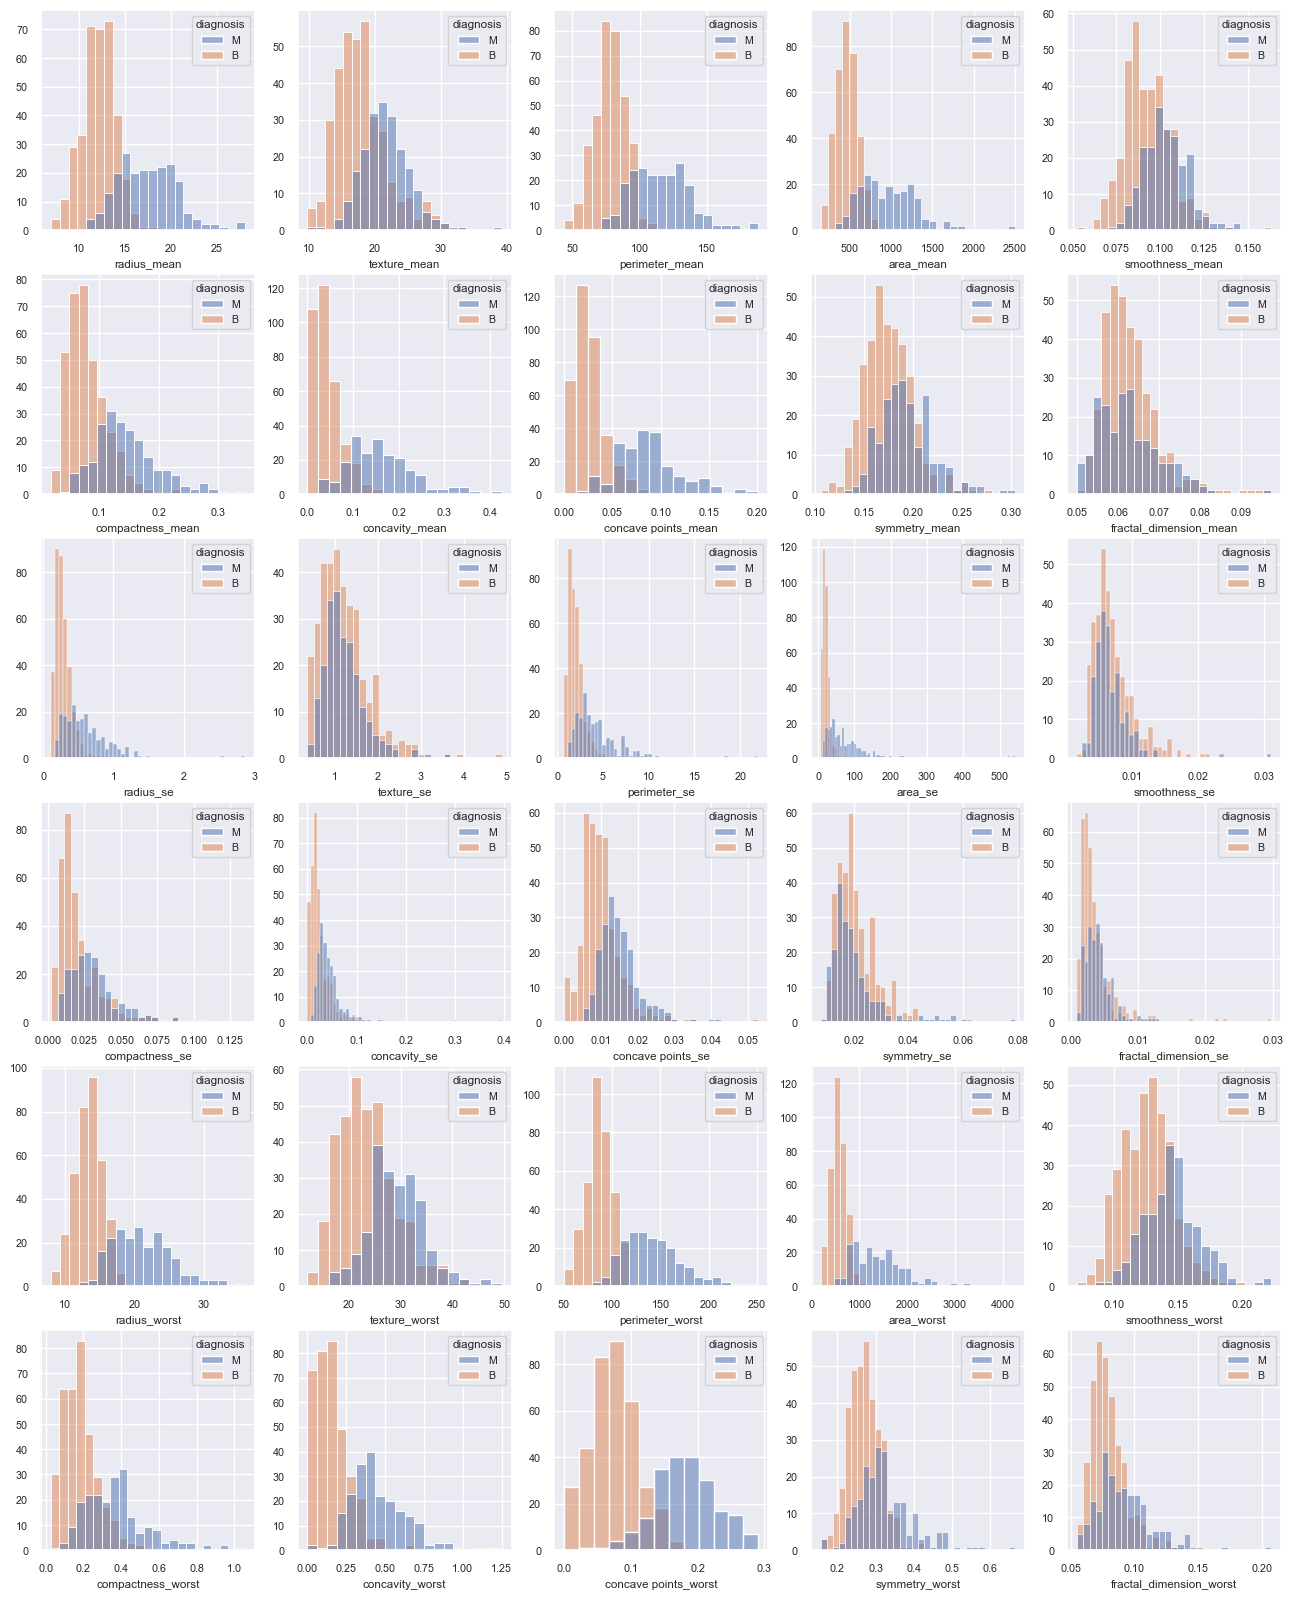

In [133]:
          # Построение гистограмм / распределений признаков
num_data = data.select_dtypes(exclude="object")
plt.rcParams.update({"font.size": 10})
sns.set_theme(style="darkgrid", font_scale=0.7)
plt.rcParams["figure.figsize"] = [16, 20]
fig = plt.figure(1)
plt.subplots(6,5)
num = 1
for el in num_data.columns.values:
    if num <= 30 :
        ax_sbplt = plt.subplot(6,5,num)
        sns.histplot(data,x=el, hue="diagnosis", ax=ax_sbplt)
        ax_sbplt.set_ylabel('')
        num += 1

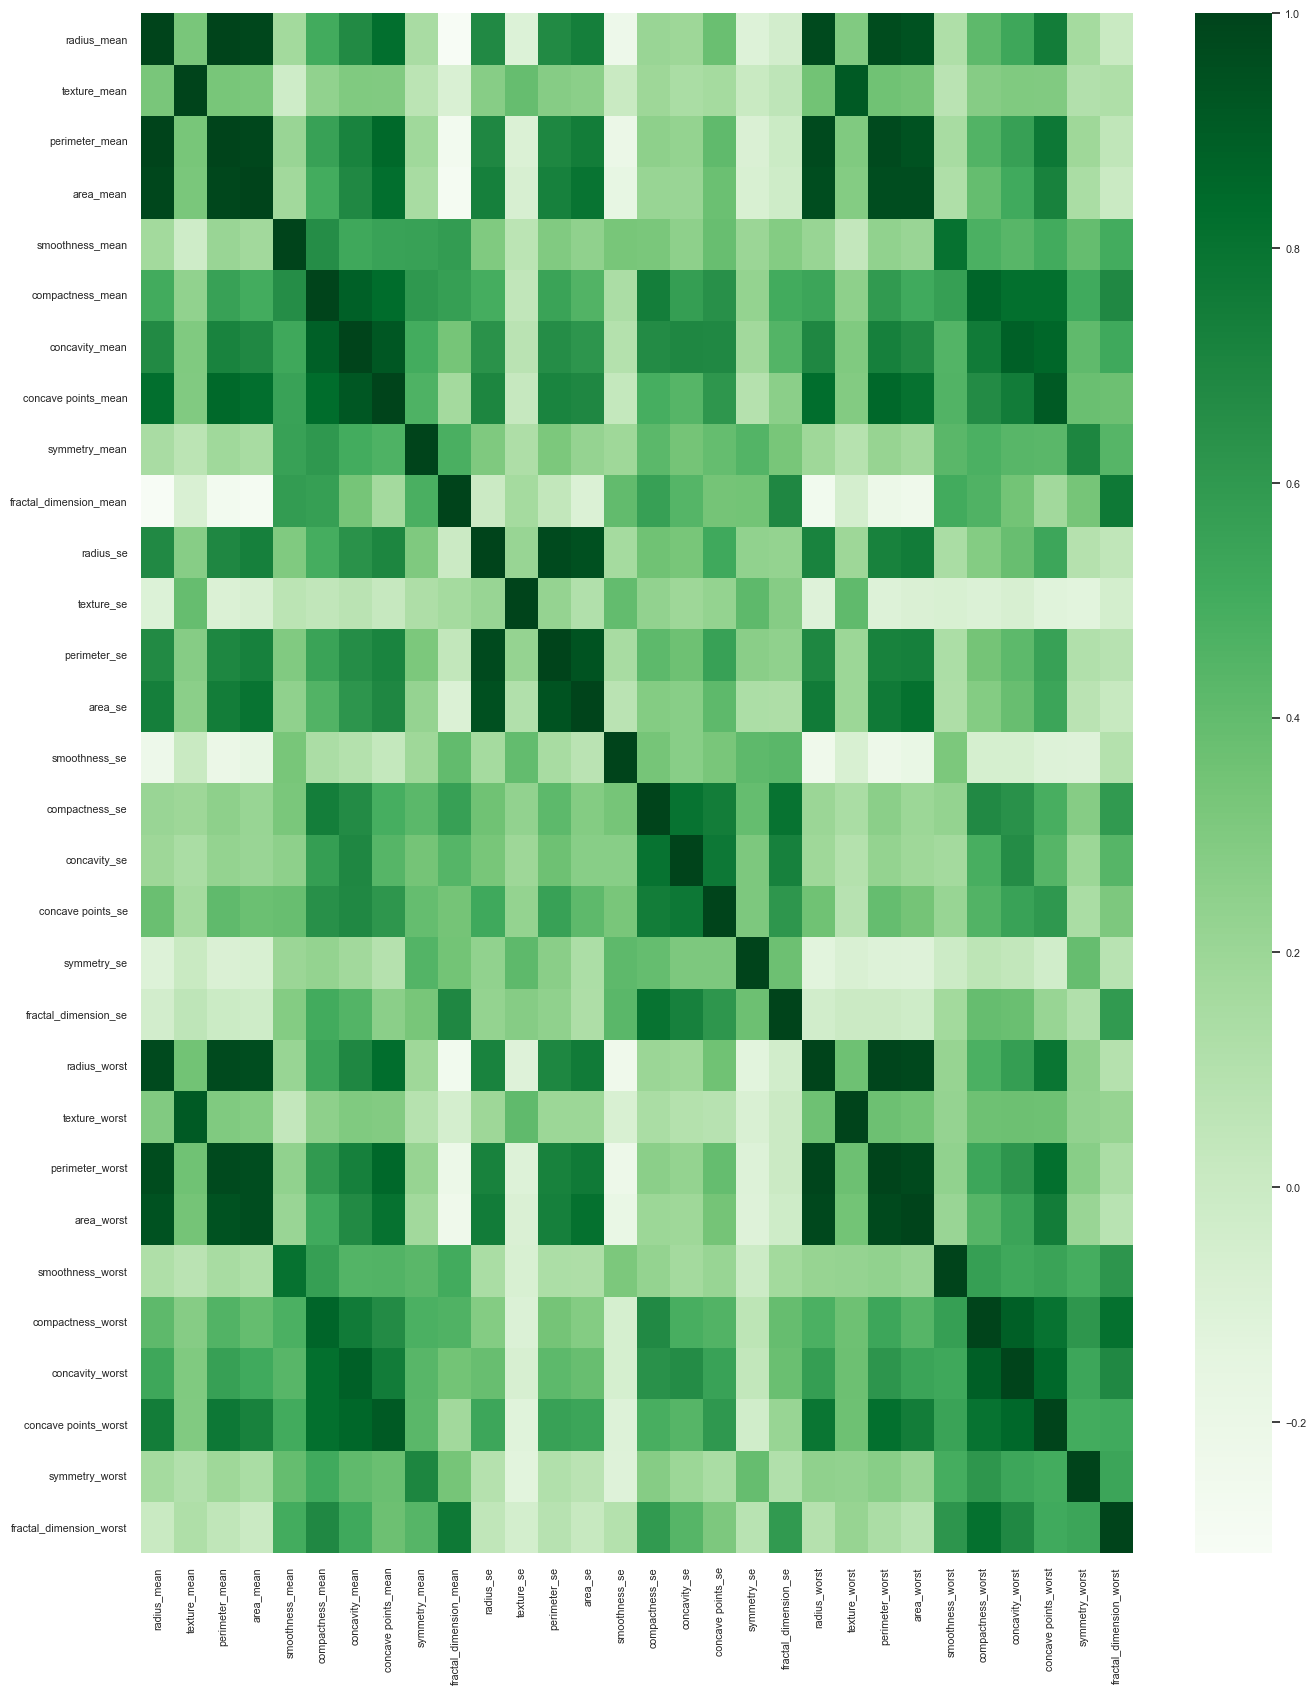

In [134]:
          # Построение тепловой матрица
cor_mat = num_data.corr()
ax_heat = sns.heatmap(cor_mat, annot=False, cmap="Greens")

<Figure size 1600x2000 with 0 Axes>

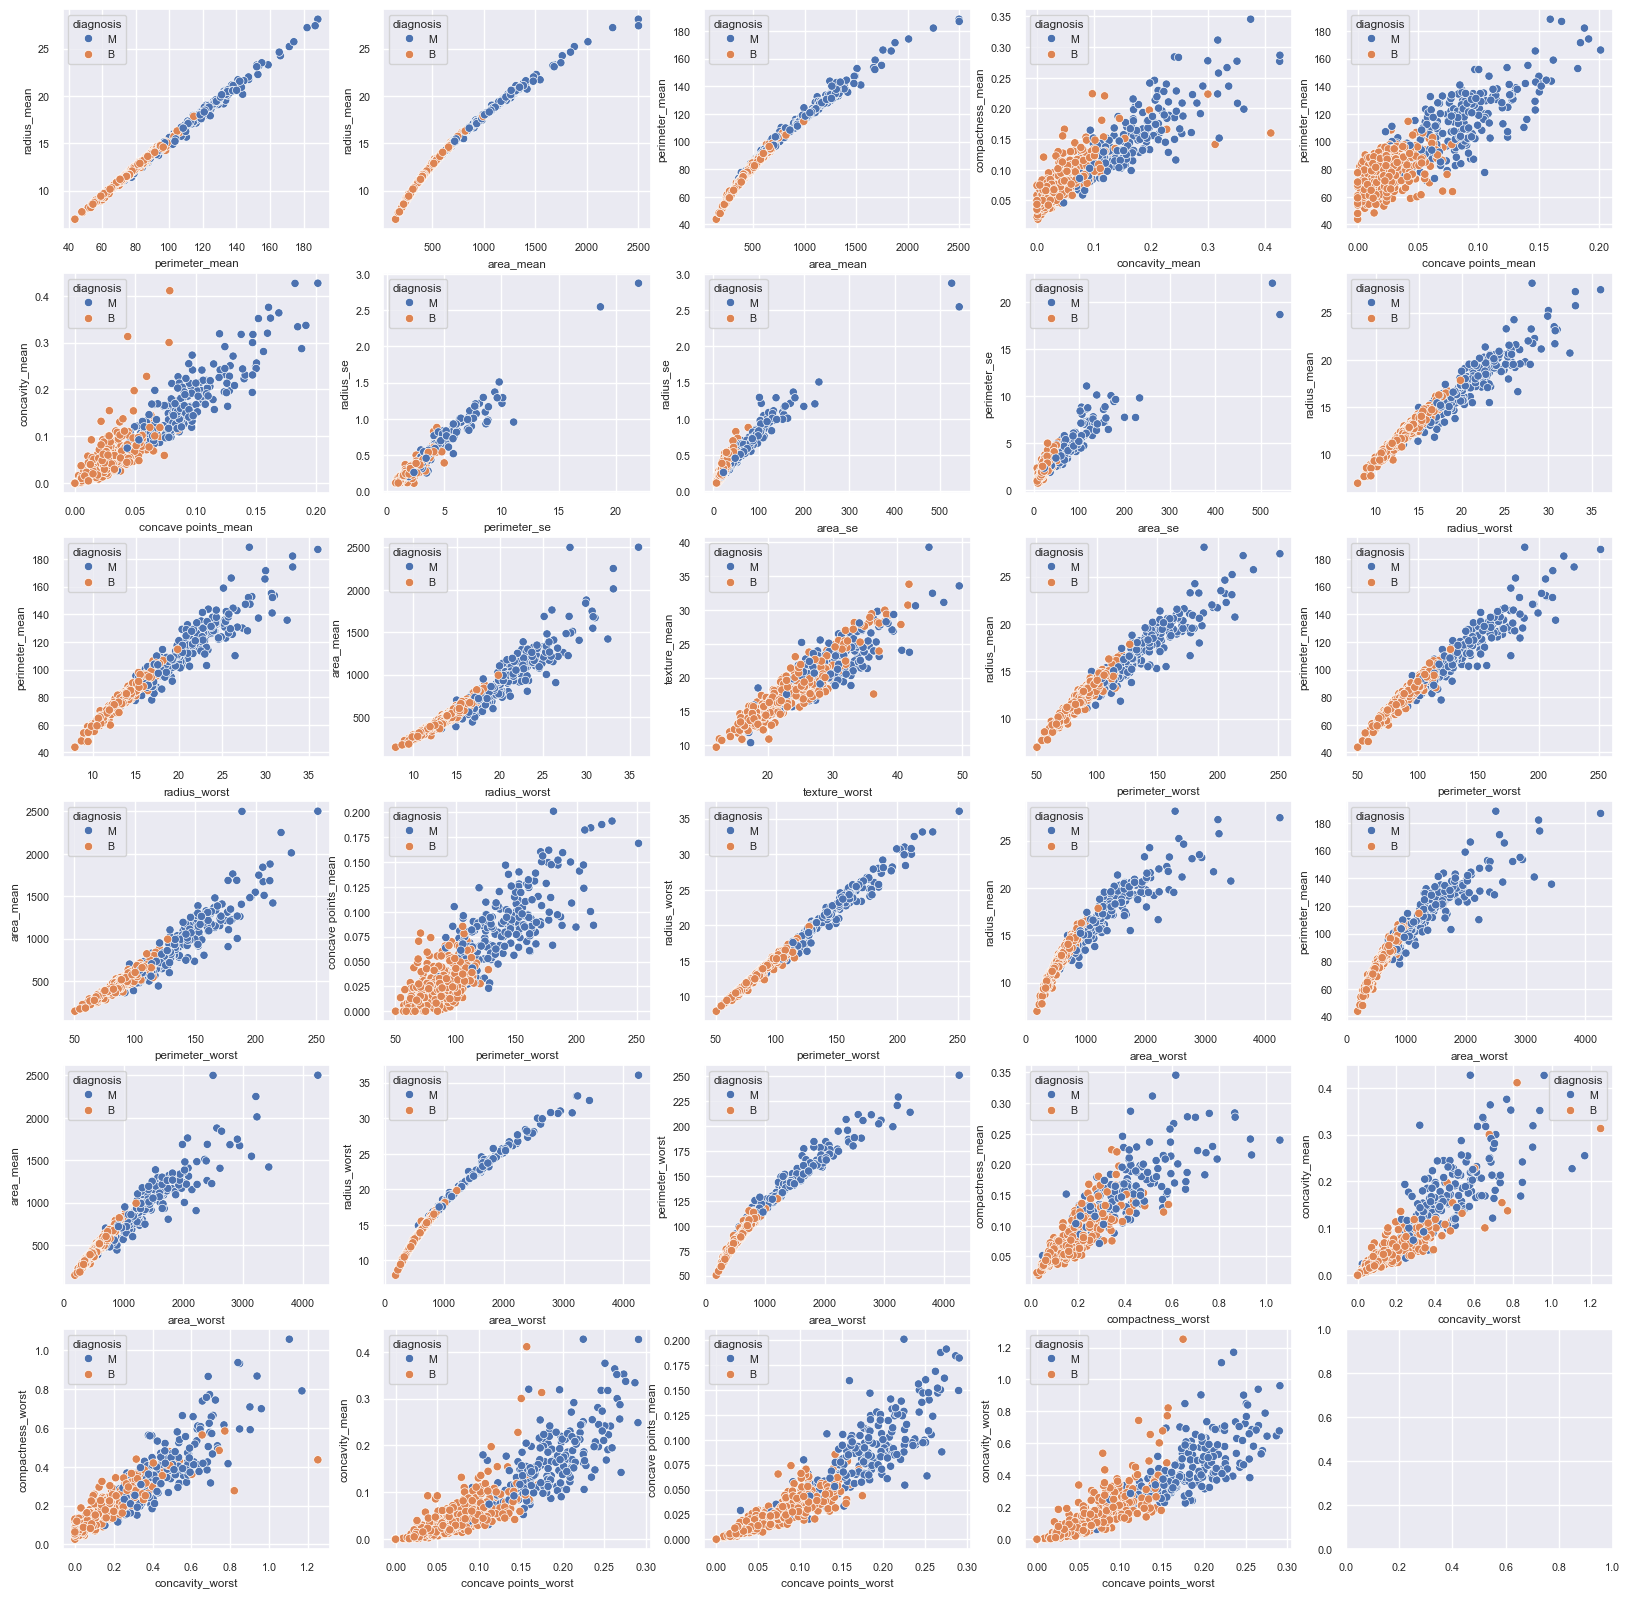

In [135]:
             # Подсчет уровня коррелированности признаков и оценка зависимостей
high_cor_pairs = []
high_cor_pairs_cnt = 0
cor_threshold = 0.85
rows = columns = list(cor_mat.columns)
num_axes = 0
c_cntr = 0
r_cntr = 0
for c_name in columns:
    c_cntr += 1
    r_cntr = 0
    for r_name in rows:
        r_cntr += 1
        if r_cntr<c_cntr and (cor_mat[c_name][r_name] > cor_threshold) and (c_name != r_name) :
            num_axes += 1
            high_cor_pairs.append([c_name, r_name])
high_cor_pairs_cnt = num_axes

nrows = round(num_axes / 5)
if nrows * 5 < num_axes : nrows+=1
fig = plt.figure(2)
plt.rcParams["figure.figsize"] = [20, 20]
plt.subplots(nrows, 5)
num_axes = 0
c_cntr = 0
r_cntr = 0
for c_name in columns:
    c_cntr += 1
    r_cntr = 0
    for r_name in rows:
        r_cntr += 1
        if r_cntr<c_cntr and (cor_mat[c_name][r_name] > cor_threshold) and (c_name != r_name):
            num_axes += 1
            ax_sbplt = plt.subplot(nrows, 5, num_axes)
            sns.scatterplot(data, x=data[c_name], y=data[r_name], hue='diagnosis', ax=ax_sbplt)

In [136]:
print(f"Число пар признаков со взаимной корреляцией более 0.85: {high_cor_pairs_cnt}\n")
print("Список пар признаков с высокой корреляцией (выше порога 0.9)")
for el in high_cor_pairs:
    print(el)

Число пар признаков со взаимной корреляцией более 0.85: 29

Список пар признаков с высокой корреляцией (выше порога 0.9)
['perimeter_mean', 'radius_mean']
['area_mean', 'radius_mean']
['area_mean', 'perimeter_mean']
['concavity_mean', 'compactness_mean']
['concave points_mean', 'perimeter_mean']
['concave points_mean', 'concavity_mean']
['perimeter_se', 'radius_se']
['area_se', 'radius_se']
['area_se', 'perimeter_se']
['radius_worst', 'radius_mean']
['radius_worst', 'perimeter_mean']
['radius_worst', 'area_mean']
['texture_worst', 'texture_mean']
['perimeter_worst', 'radius_mean']
['perimeter_worst', 'perimeter_mean']
['perimeter_worst', 'area_mean']
['perimeter_worst', 'concave points_mean']
['perimeter_worst', 'radius_worst']
['area_worst', 'radius_mean']
['area_worst', 'perimeter_mean']
['area_worst', 'area_mean']
['area_worst', 'radius_worst']
['area_worst', 'perimeter_worst']
['compactness_worst', 'compactness_mean']
['concavity_worst', 'concavity_mean']
['concavity_worst', 'compa

<Figure size 2000x2000 with 0 Axes>

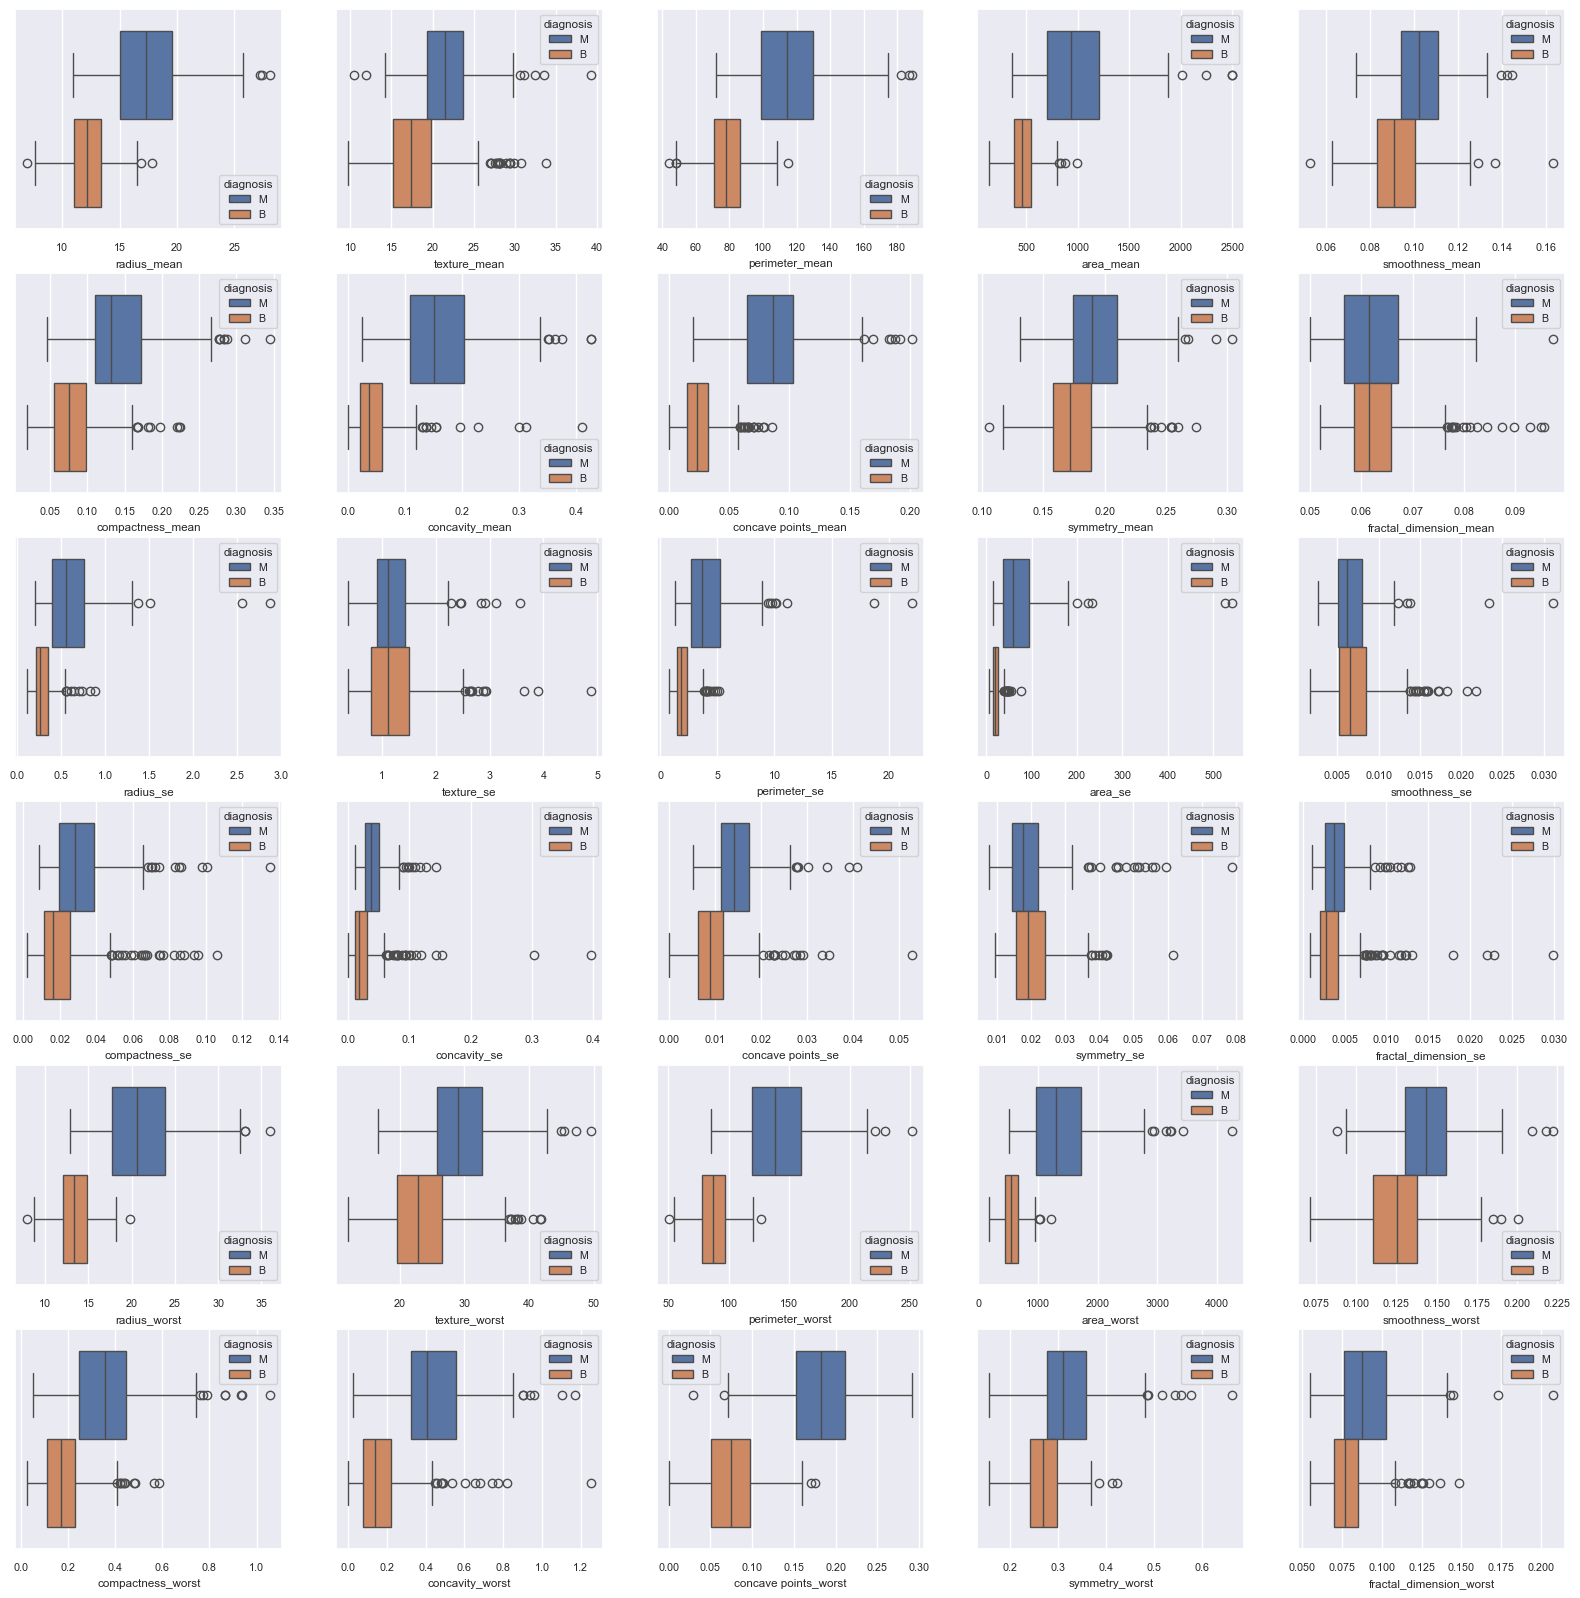

In [137]:
             # Построение диаграмм размаха
fig = plt.figure(3)
plt.rcParams["figure.figsize"] = [20, 20]
plt.subplots(6, 5)

num_axes = 0
for el in rows:
    num_axes += 1
    ax_sbplt = plt.subplot(6, 5, num_axes)
    sns.boxplot(data, x = data[el], hue = "diagnosis", ax = ax_sbplt)

## Часть 2. Моделирование при помощи kNN

In [138]:
           # Разбиение данных на train-test (30% выборки для тестирования)
data["diagnosis"] = data["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X_train, X_test, y_train, y_test = train_test_split(data.drop("diagnosis", axis=1), data["diagnosis"], test_size=0.30, random_state=1802, stratify=data["diagnosis"])

In [139]:
           # Средние значения признаков
X_train.mean(axis=0)

radius_mean                 14.173329
texture_mean                19.395553
perimeter_mean              92.293995
area_mean                  659.907035
smoothness_mean              0.096527
compactness_mean             0.104365
concavity_mean               0.090644
concave points_mean          0.049665
symmetry_mean                0.180364
fractal_dimension_mean       0.062880
radius_se                    0.412081
texture_se                   1.241494
perimeter_se                 2.910404
area_se                     41.561842
smoothness_se                0.007077
compactness_se               0.025457
concavity_se                 0.032432
concave points_se            0.011911
symmetry_se                  0.020519
fractal_dimension_se         0.003868
radius_worst                16.333741
texture_worst               25.876382
perimeter_worst            107.694422
area_worst                 889.454523
smoothness_worst             0.132359
compactness_worst            0.251451
concavity_wo

In [140]:
           # стандартные отклонения признаков
X_train.std(axis=0)

radius_mean                  3.542558
texture_mean                 4.458898
perimeter_mean              24.500065
area_mean                  356.374661
smoothness_mean              0.014325
compactness_mean             0.053399
concavity_mean               0.082771
concave points_mean          0.039071
symmetry_mean                0.026578
fractal_dimension_mean       0.007020
radius_se                    0.295078
texture_se                   0.550769
perimeter_se                 2.157244
area_se                     50.103611
smoothness_se                0.002862
compactness_se               0.018672
concavity_se                 0.033064
concave points_se            0.006266
symmetry_se                  0.008010
fractal_dimension_se         0.002888
radius_worst                 4.877054
texture_worst                6.371273
perimeter_worst             33.970236
area_worst                 581.271072
smoothness_worst             0.022600
compactness_worst            0.157453
concavity_wo

In [141]:
           # Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'Стандартиованные средние значения:\n {X_train.mean(axis=0)}')
print(f'Стандартиованные стандартные отклонения:\n {X_train.std(axis=0)}')

Стандартиованные средние значения:
 [-2.52171260e-16  3.92762316e-16 -3.32509006e-16  6.69481221e-18
  4.28467981e-16 -4.46320814e-17 -7.47587363e-17 -1.62907097e-16
  2.29855219e-16 -9.37273709e-17  1.29433036e-16  4.01688733e-17
  1.78528326e-17 -3.12424570e-17  2.80066311e-16  7.58745384e-17
  4.12846753e-17 -8.70325587e-17 -1.00422183e-16  6.91797262e-17
 -3.57056651e-17  4.99879312e-16 -4.53015626e-16 -5.80217058e-17
 -8.21230298e-16 -1.36127848e-16 -2.67792488e-17 -1.56212285e-16
  6.47165180e-17 -5.44511393e-16]
Стандартиованные стандартные отклонения:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [142]:
           # Создание функции печати результатов моделирования
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

In [143]:
           # Построение модели kNN «из коробки» без настройки параметров
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)
y_test = y_test.to_numpy()
quality(y_predict,y_test)

Accuracy:  0.971
Precision: 0.938
Recall:    0.984
F1-score:  0.960


In [144]:
print("Значение ROC-AUC:", round(roc_auc_score(y_test, X_test [:,1]),3))

Значение ROC-AUC: 0.758


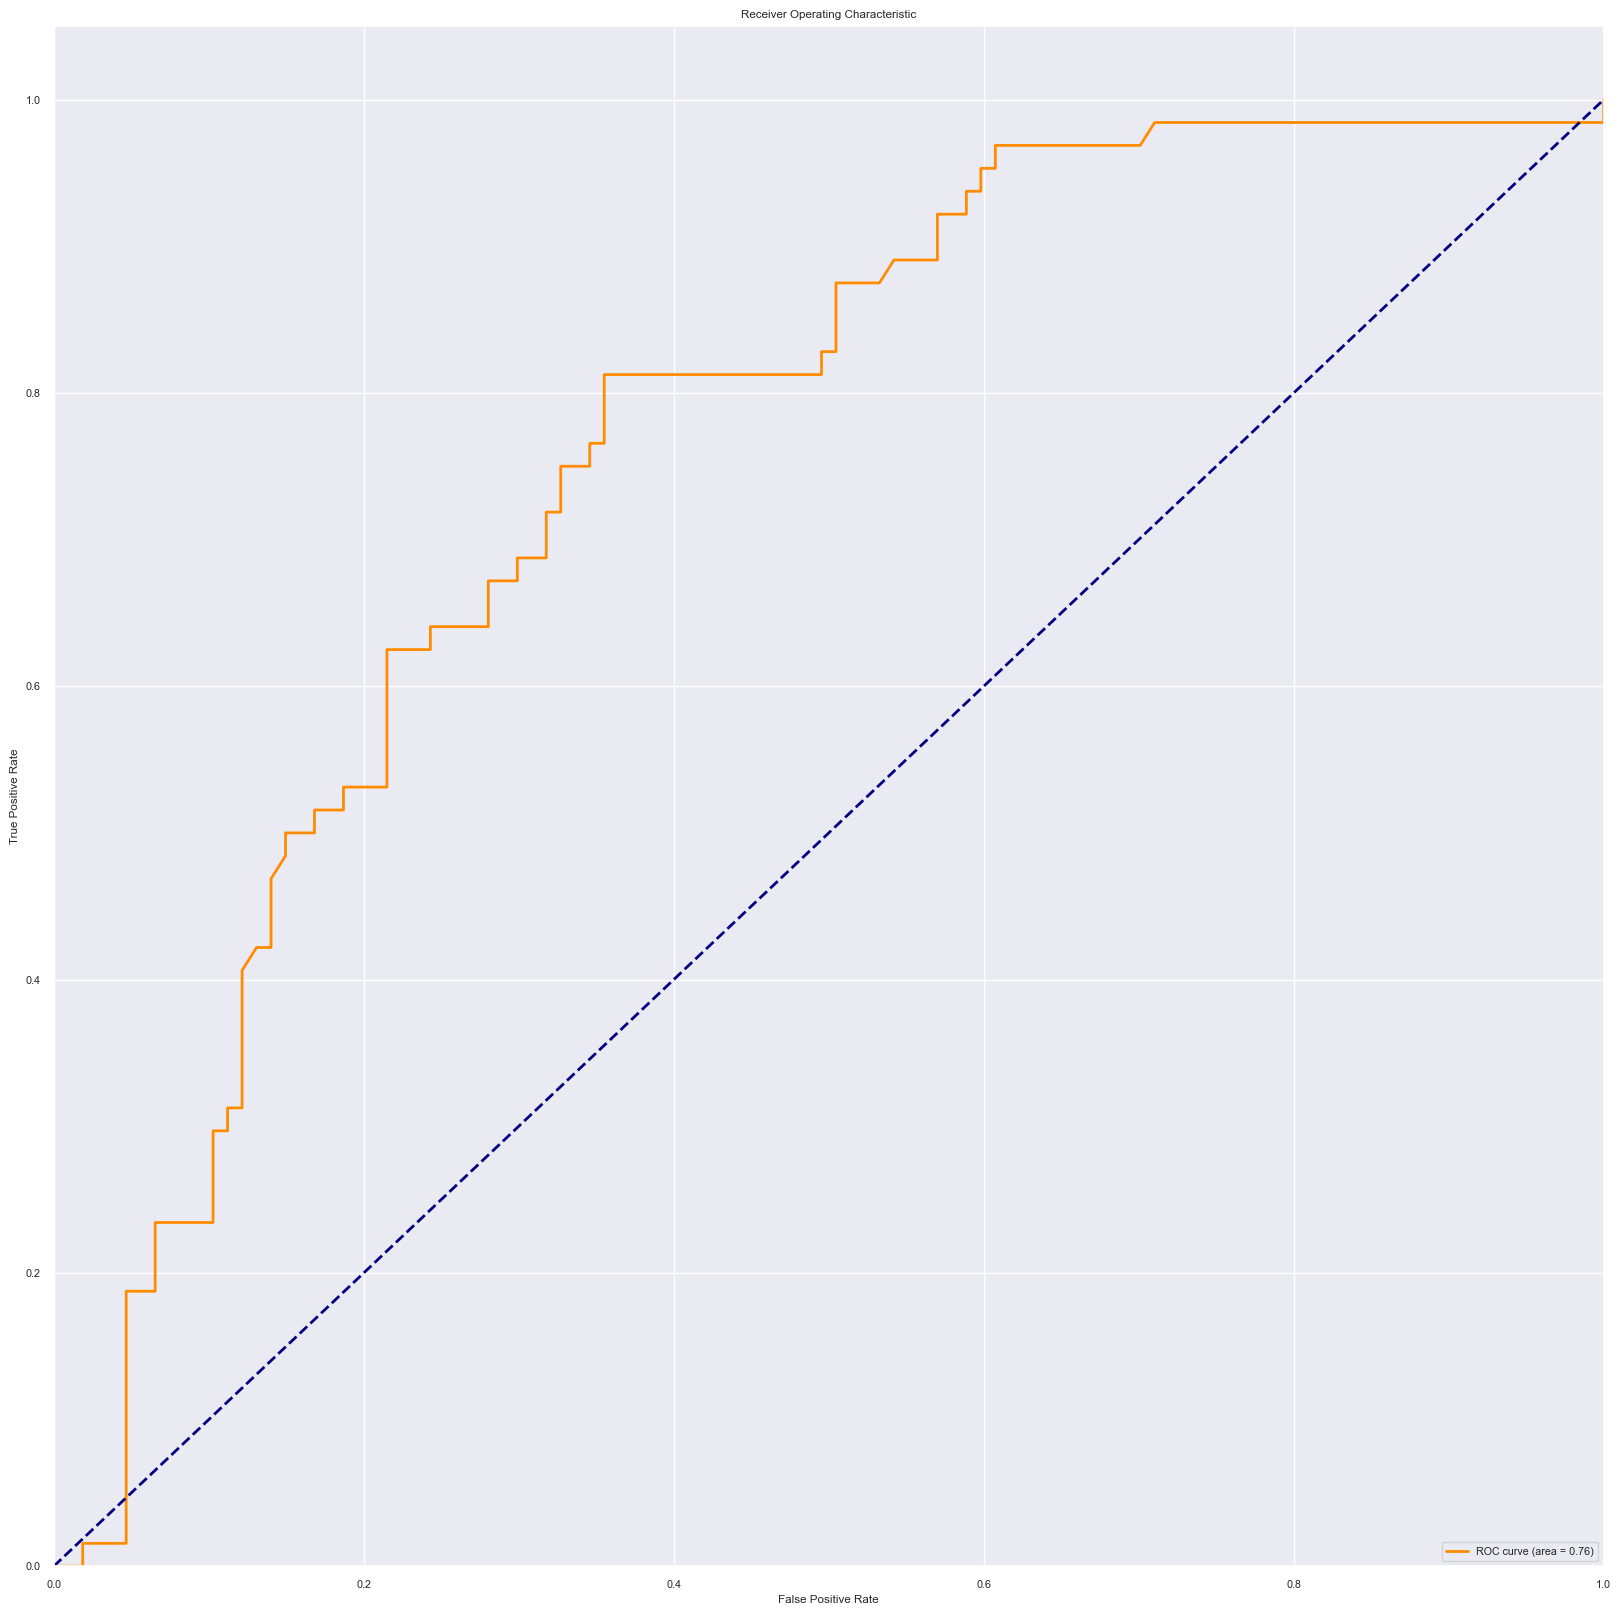

In [145]:
           # Построение ROC-графика
fpr, tpr, thresholds = roc_curve(y_test, (X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [146]:
            # Подбор параметров (p отвечает за выбор метрики расстояния)
param_grid = {"n_neighbors": range(1, 50),}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid, cv = 5, scoring = "accuracy")
clf.fit(X_train,y_train)
print("Best params: ", clf.best_params_)
print("Best accuracy: ", clf.best_score_)

print("Значение ROC-AUC:", round(roc_auc_score(y_test, clf.best_estimator_.predict_proba(X_test)[:,1]),3))

Best params:  {'n_neighbors': 2}
Best accuracy:  0.9623734177215189
Значение ROC-AUC: 0.971


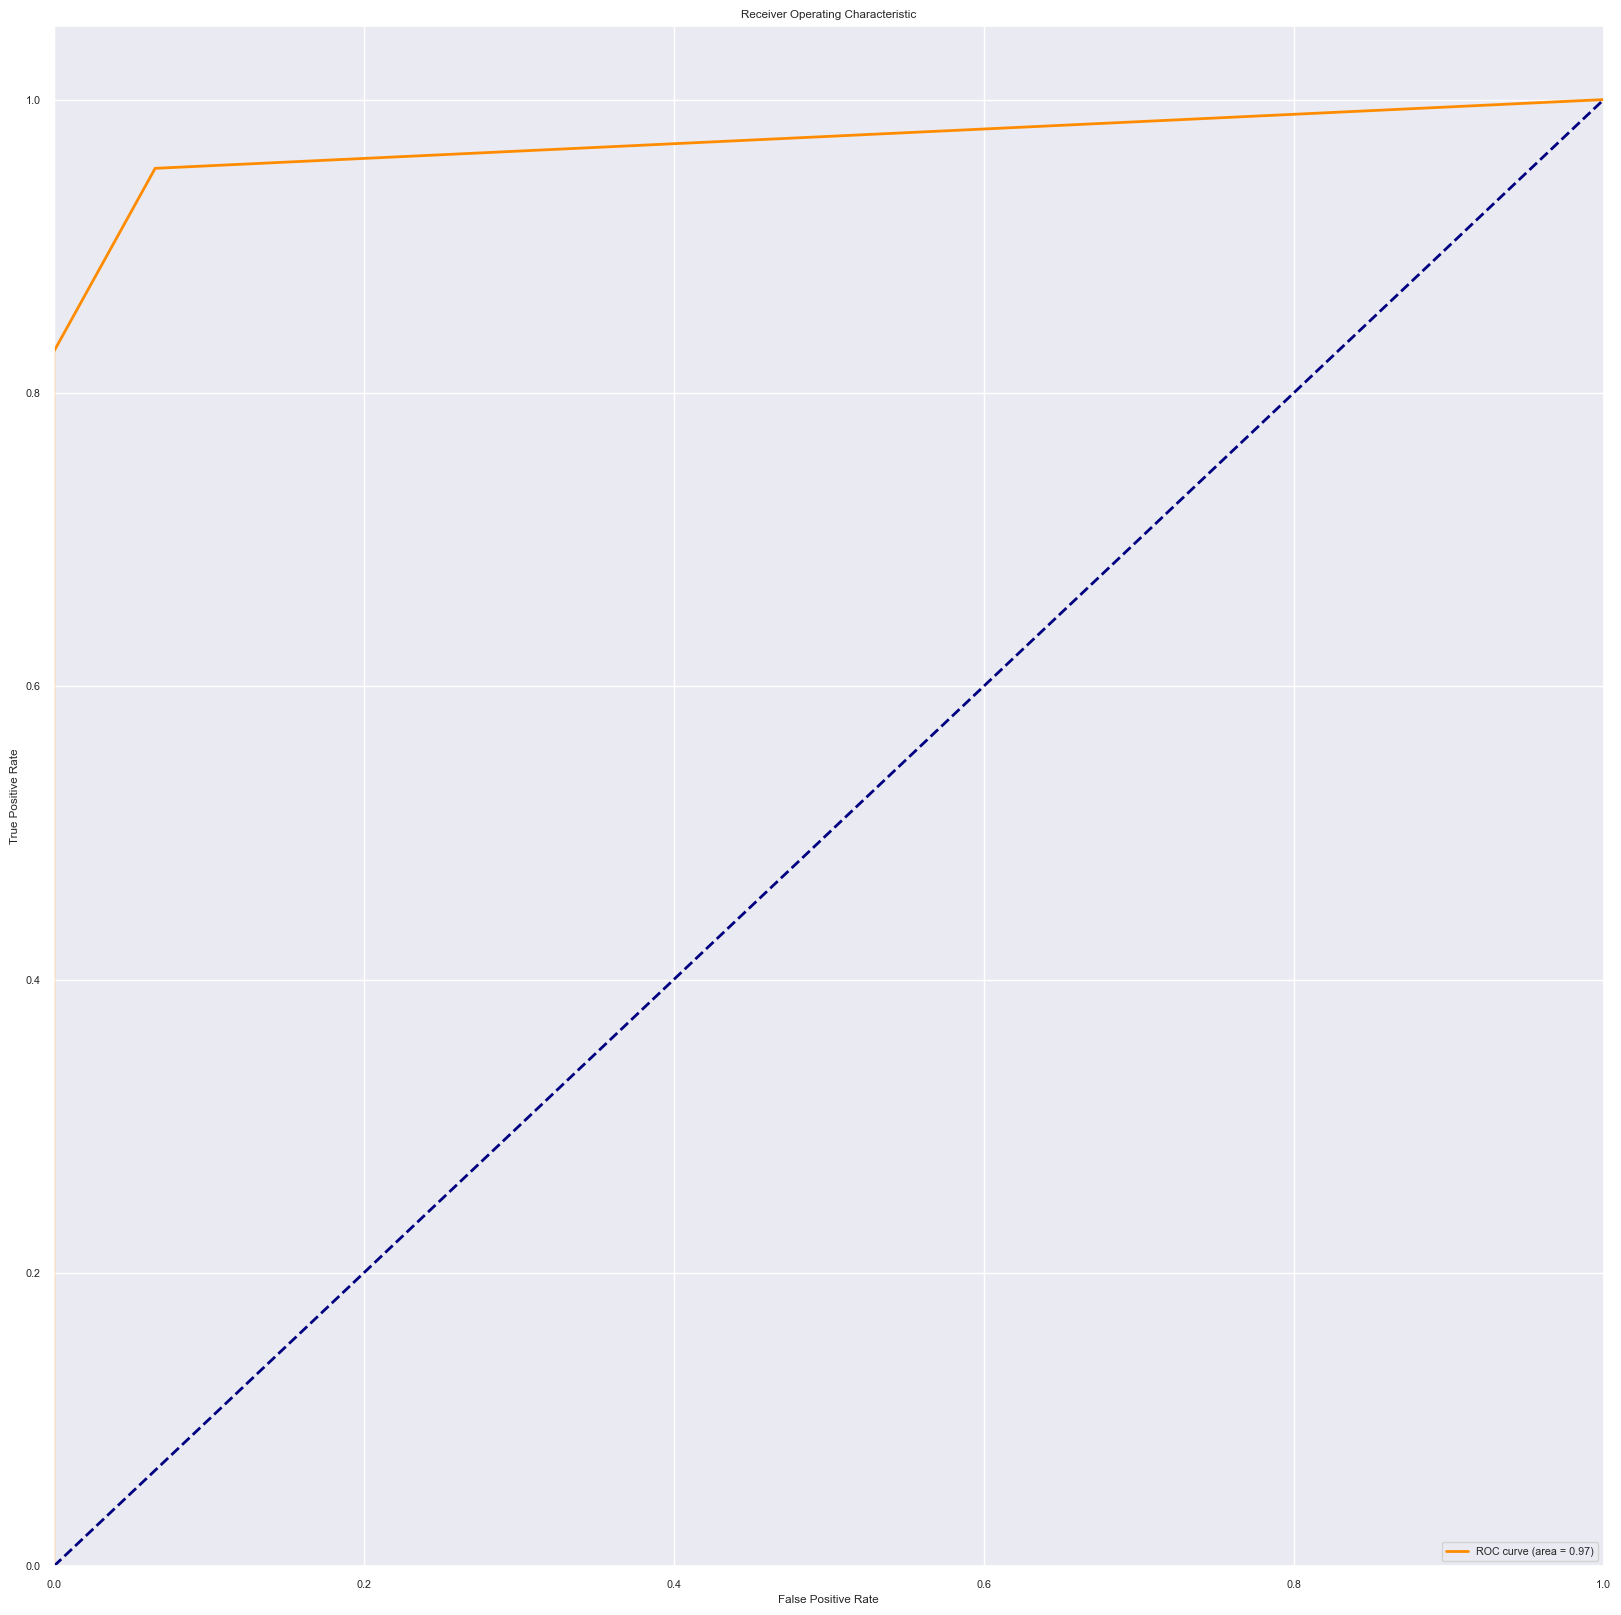

In [147]:
           # Построение ROC-графика
fpr, tpr, thresholds = roc_curve(y_test, clf.best_estimator_.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

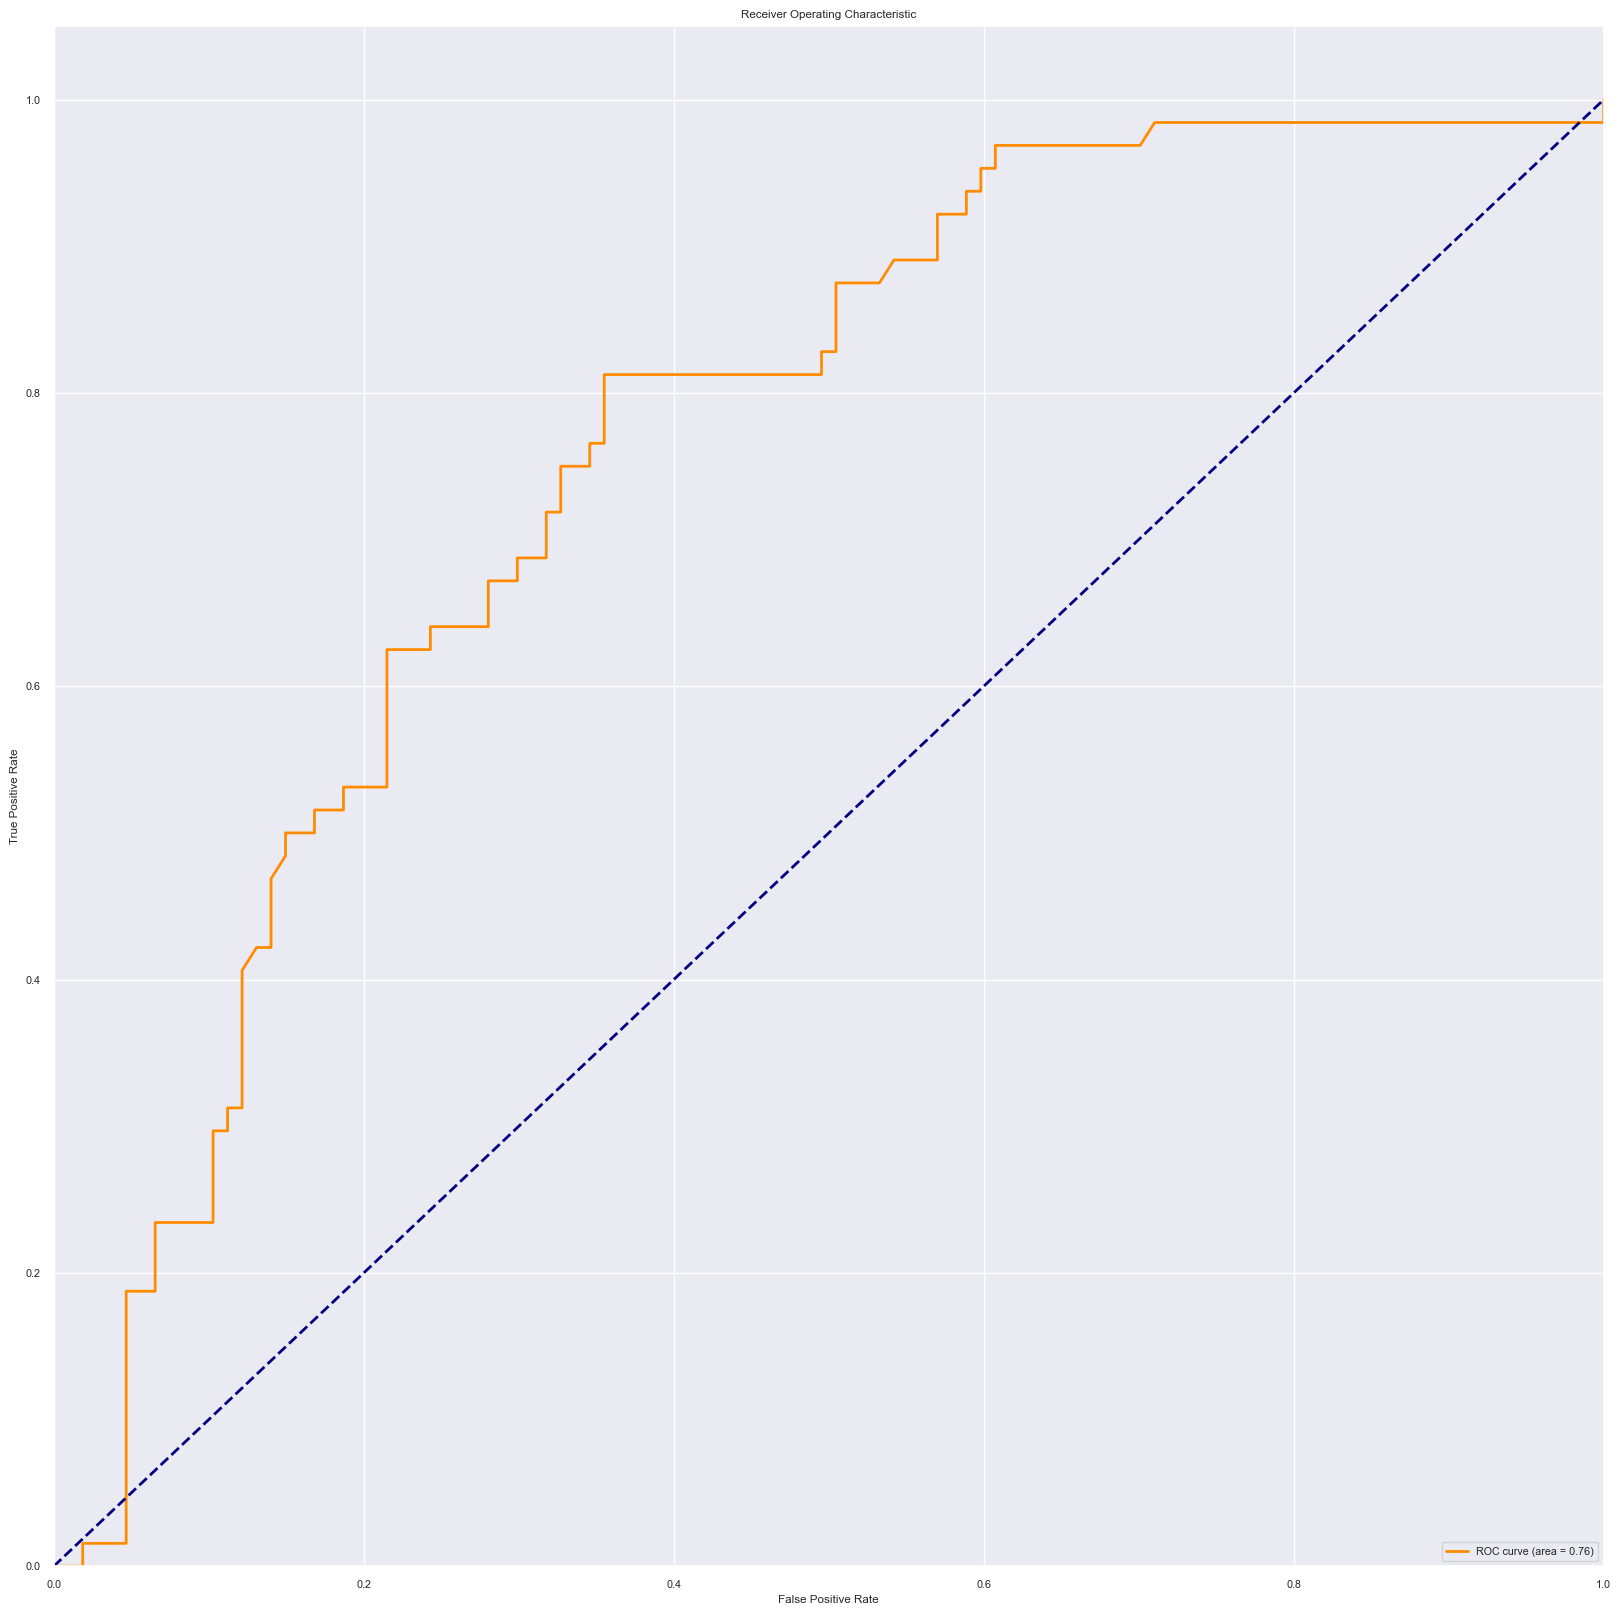

In [152]:
           # Построение ROC-графика
fpr, tpr, thresholds = roc_curve(y_test, (X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()